# Data Mining Fianl Project 2021 Summer

####  😀   Yuqing (110057)

## 📚algorithm

* LogisticRegression
* Descision tree
* Bagging

## 📈Dataset
https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

## 📍Task
Analyze data and build models to predict which jobs are fake.

## 📊STEPS

#### 无用数据
* 删除Unnamed列
* 删除部分难以观测的变量

#### Missing
* 填补unknown
* 填补blank

#### 比较特殊的Salary_range
* max_salary
* min_salary

#### 数值变量格式str转numeric
* df.val = pd.to_numeric(df.val)

#### Text info的处理，采用编码
* 离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
* 离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

#### 归一化处理
* 标准差标准化（standardScale）使得经过处理的数据符合标准正态分布
* 提高精度

#### 拆分数据集
* 70%训练集
* 30%验证集

#### 特征选择
* PCA降维处理

#### 建立模型
* 克隆处理
* LR
* Decession Tree
* Bagging

#### 总结模型分数
* LR |  0.447
* DT |  0.879
* BA |  0.961

In [1]:
import numpy as np 
import pandas as pd
df = pd.read_csv('C:\\Users\\Yuqing\\Desktop\\fake_job_postings.csv',low_memory=False)
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,located in Houston,is actively seeking an experienced Commission...,environmental,"and safety regulations.""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17837 entries, 0 to 17836
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               17837 non-null  int64  
 1   title                17837 non-null  object 
 2   location             17493 non-null  object 
 3   department           6321 non-null   object 
 4   salary_range         2866 non-null   object 
 5   company_profile      14536 non-null  object 
 6   description          17836 non-null  object 
 7   requirements         15172 non-null  object 
 8   benefits             10824 non-null  object 
 9   telecommuting        17827 non-null  object 
 10  has_company_logo     17821 non-null  object 
 11  has_questions        17800 non-null  object 
 12  employment_type      14406 non-null  object 
 13  required_experience  10899 non-null  object 
 14  required_education   9898 non-null   object 
 15  industry             12977 non-null 

In [4]:
# df['fraudulent'].value_counts()

* 部分列没用列名，可以直接删除
* **telecommuting**、**has_company_logo**,**has_questions**、**fraudulent**本应该是0或者1，但是里面混合了部分text信息，需要清除
* **job_id**, **title**, **location**, **department**, **industry**, **function**这几个变量难以观测，可以直接删除

In [5]:
# 删除unnamed列
df=df.iloc[:,0:18]

In [6]:
# 删除telecommuting、has_company_logo、has_questions、fraudulent列里面非0或者非1的行
df=df[(df.telecommuting=='1')|(df.telecommuting=='0')]
df=df[(df.has_company_logo=='1')|(df.has_company_logo=='0')]
df=df[(df.has_questions=='1')|(df.has_questions=='0')]
df=df[(df.fraudulent=='1')|(df.fraudulent=='0')]

In [7]:
# 可以看到这是unblanced dataset
df['fraudulent'].value_counts()

0    16700
1      863
Name: fraudulent, dtype: int64

In [8]:
# 删除{'job_id':0, 'title':1, 'location':2, 'department':3, 'industry':15, 'function':16}
df= df.drop(['job_id','title','location','department','industry','function'], axis=1)

In [9]:
# 是唯一值的个数
df.nunique()

salary_range             867
company_profile         1703
description            14527
requirements           11713
benefits                6111
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
fraudulent                 2
dtype: int64

In [10]:
df.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
5,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,0


#### 两组
* {'employment_type'：5, 'required_experience'：7, 'required_education'：13} | 有很多遗漏值，并且分别只有5、7和13个唯一的对象/类别值。 这些是离散变量，我们将所有缺少的值替换为新的对象/类别值“Unkonwn”。 
* {'company_profile':1703, 'description':14527, 'requirements':11713, 'benefits':6111}|需要通过文本/语言分析来发现基础信息，因此我们将用空格“”代替“Unkonwn”来填充任何空值。

这样一来，我们便可以进行文本分析，仅对已经存在的文本进行处理，而不对我们引入的文本进行处理，并且在进行上述分析时，空格将被忽略

In [11]:
cat_columns = ['employment_type', 'required_experience', 'required_education']

for col in cat_columns:
    df[col].fillna("Unknown", inplace=True) #用Unknown填补

In [12]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

df = df.dropna(subset=text_columns, how='all') #删除所有值均为NA的行

for col in text_columns:
    df[col].fillna(' ', inplace=True) # 用空格填补，空格在分析时，会被忽略

In [13]:
df.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
5,NaN,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,0


In [14]:
unique_salary = df['salary_range'].unique()
print(unique_salary[0:5])

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000']


In [15]:
new = df['salary_range'].str.split("-", n = 1, expand = True) 

df['salary_range_min']= new[0]
df['salary_range_max']= new[1]

df['salary_range_min'].fillna('-1', inplace=True)
df['salary_range_max'].fillna('-1', inplace=True)

def remove_string(x):
    if not x.isnumeric(): 
        val = '-1'
    else:
        val = x
    return val

df['salary_range_min'] = df['salary_range_min'].apply(lambda x: remove_string(x))
df['salary_range_max'] = df['salary_range_max'].apply(lambda x: remove_string(x))
df.drop('salary_range', axis=1, inplace = True)

In [16]:
fraudulent=df.pop('fraudulent')
df.insert(12,'fraudulent',fraudulent)

#### 把数值变量格式从str转化成数值(Convert numeric variable format from str to numeric)

* df.val = pd.to_numeric(df.val)

In [17]:
df.fraudulent=pd.to_numeric(df.fraudulent)
df.telecommuting=pd.to_numeric(df.telecommuting)
df.has_company_logo=pd.to_numeric(df.has_company_logo)
df.has_questions=pd.to_numeric(df.has_questions)
df.salary_range_min=pd.to_numeric(df.salary_range_min)
df.salary_range_max=pd.to_numeric(df.salary_range_max)

In [18]:
df.head()

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,salary_range_min,salary_range_max,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,-1,-1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,-1,-1,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
5,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,-1,-1,0


###  数据可视化，简单看下 Fradualent Post 和 Real posts 的区别

* ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']
* ['company_profile', 'description', 'requirements', 'benefits']

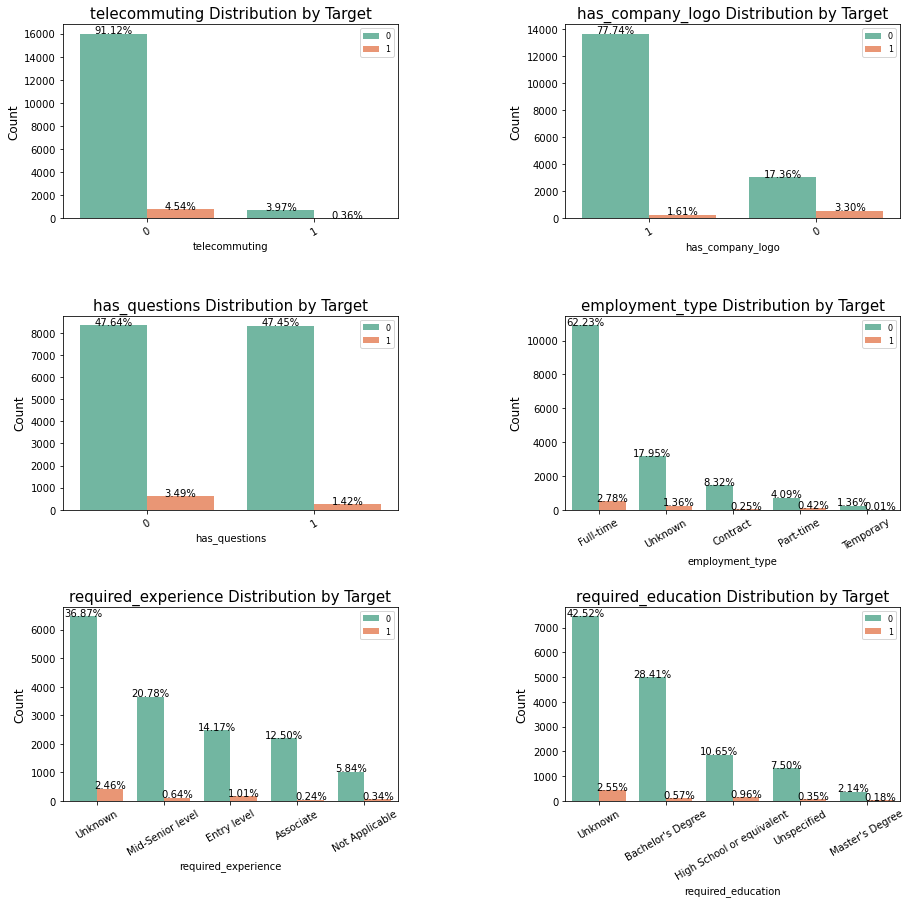

In [19]:
cat_eda_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25)) 

for n, col in enumerate(df[cat_eda_columns]): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2', order=df[col].value_counts().iloc[:5].index) 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} Distribution by Target', fontsize=15) 
    xlabels = ax.get_xticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=30) 
    total = len(df)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    
plt.show()

#### Real Posts
* ✅Telecommuting 
* ✅Company Logo 
* ✅Employment Type
* ✅Required Experience and Education

#### Fradulent Posts
* ❌Telecommuting 
* ❌Company Logo 
* ✅Employment Type
* ✅Required Experience and Education 


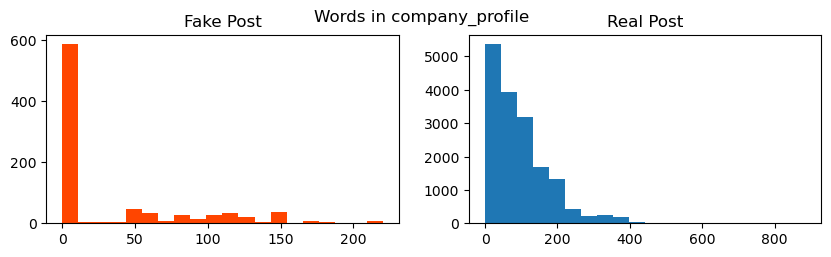

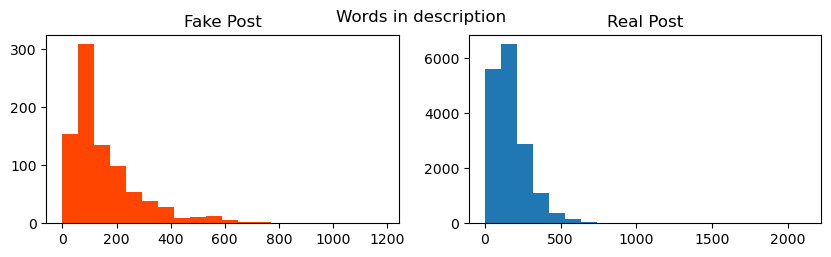

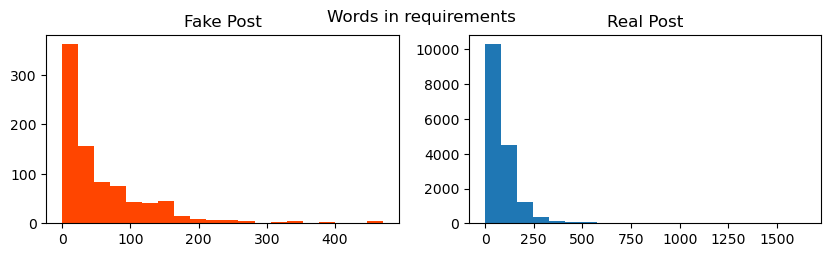

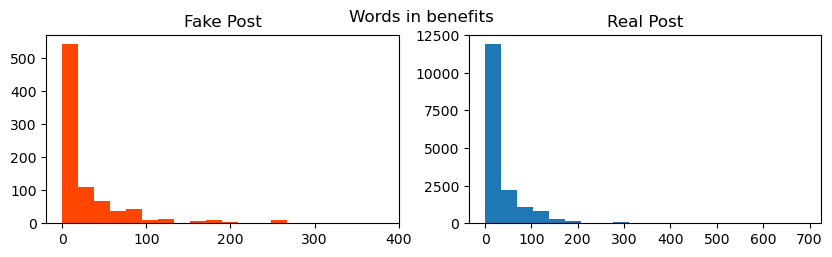

In [20]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

for col in text_cols:
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 2.5), dpi=100)
    num=df[df["fraudulent"]==1][col].str.split().map(lambda x: len(x))
    ax1.hist(num,bins = 20,color='orangered')
    ax1.set_title('Fake Post')
    num=df[df["fraudulent"]==0][col].str.split().map(lambda x: len(x))
    ax2.hist(num, bins = 20)
    ax2.set_title('Real Post')
    fig.suptitle(f'Words in {col}')
    plt.show()

</font><font color=#FF0000 size=4>Slightly different between  Real and Fradulent. Do not need to put together.

#### 离散特征的编码分为两种情况：

　　1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码

　　2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

#### 两组

* company_profile，description，requirements，benefits   | one-hot encoding

* employment_type，required_experience，required_education | 数值的映射

In [21]:
# 描述性相关的变量转为长度
df.company_profile=df.company_profile.str.len()
df.description=df.description.str.len()
df.requirements=df.requirements.str.len()
df.benefits=df.benefits.str.len()

In [22]:
df.required_education.value_counts()

Unknown                              7915
Bachelor's Degree                    5090
High School or equivalent            2039
Unspecified                          1379
Master's Degree                       406
Associate Degree                      271
Certification                         170
Some College Coursework Completed     101
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [23]:
# 数值映射
edu_mapping={'Unknown':0,'Unspecified':0,'Some High School Coursework':1,
             'High School or equivalent':2,'Vocational':3,'Vocational - HS Diploma':3,
             'Vocational - Degree':3,'Certification':4,'Associate Degree':5,
             'Some College Coursework Completed':6,"Bachelor's Degree":7,
             'Professional':8,"Master's Degree":9,'Doctorate':10}
df.required_education=df.required_education.map(edu_mapping)
df.required_experience.value_counts()

Unknown             6907
Mid-Senior level    3763
Entry level         2666
Associate           2237
Not Applicable      1086
Director             385
Internship           379
Executive            139
Name: required_experience, dtype: int64

In [24]:
exp_mapping={'Unknown':0,'Not Applicable':0,'Entry level':1,'Internship':2,'Associate':3,'Mid-Senior level':4,'Director':5,'Executive':5}
df.required_experience=df.required_experience.map(exp_mapping)
df.employment_type.value_counts()

Full-time    11416
Unknown       3392
Contract      1505
Part-time      792
Temporary      240
Other          217
Name: employment_type, dtype: int64

In [25]:
# one hot encode的方式
df2=pd.get_dummies(df,drop_first=True,dtype=int)
df2

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_experience,required_education,salary_range_min,salary_range_max,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown
0,885,905,852,1,0,1,0,2,0,-1,-1,0,0,1,0,0,0
1,1286,2077,1433,1292,0,1,0,0,0,-1,-1,0,1,0,0,0,0
3,614,2600,1429,782,0,1,0,4,7,-1,-1,0,1,0,0,0,0
4,1628,1520,757,21,0,1,1,4,7,-1,-1,0,1,0,0,0,0
5,1,3418,1,1,0,0,0,0,0,-1,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17832,1708,1442,1273,857,0,1,1,4,0,-1,-1,0,1,0,0,0,0
17833,2270,1216,721,511,0,1,1,4,7,-1,-1,0,1,0,0,0,0
17834,228,1291,1235,1,0,0,0,0,0,-1,-1,0,1,0,0,0,0
17835,1,506,502,216,0,0,1,0,8,-1,-1,0,0,0,0,0,0


## 特征选择

* 利用PCA降维处理，来进行特征选择

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pca = PCA()

stdsc = StandardScaler()
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]



X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.43263171e-01, 1.24966248e-01, 9.53811166e-02, 7.05639547e-02,
       6.84802809e-02, 6.43330670e-02, 6.20926460e-02, 6.15569770e-02,
       5.82820583e-02, 5.53147913e-02, 5.18239188e-02, 4.90649167e-02,
       3.81719698e-02, 2.99793222e-02, 2.67134354e-02, 1.21259188e-05])

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#### 归一化处理|  作用：去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。 

* 归一化后加快了梯度下降求最优解的速度；
* 归一化有可能提高精度
* 标准差标准化（standardScale）使得经过处理的数据符合标准正态分布

* **sklearn.base clone** | 克隆在估算器中进行模型的深层复制，而无需实际复制附加数据。 它会产生一个新的估算器，该估算器具有未在任何数据上拟合的相同参数。
* **itertools combinations**|  创建一个迭代器，返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序combinations('ABCD', 2) --> AB AC AD BC BD CD

In [28]:
from sklearn.preprocessing import StandardScaler  ## 标准化工具

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Dealing with data imbalance by upsampling

In [29]:
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]

In [30]:
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
y_imb

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 3392
Number of class 1 samples after: 14170


In [32]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [33]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

# 建立模型  LR | Decission Tree |Bagging

* 克隆处理
* 建模 
* 模型比较分析

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

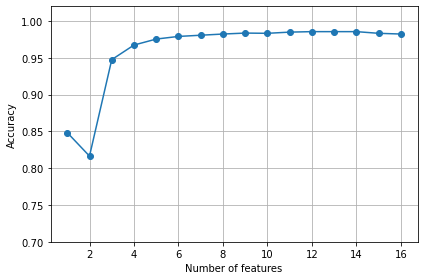

In [35]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

### Pick 6 X features.

In [36]:
k6 = list(sbs.subsets_[10])
print(df2.columns[1:][k6])

Index(['required_education', 'salary_range_min', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown'],
      dtype='object')


In [37]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9842186610266005
Test accuracy: 0.9777946479407857
Training accuracy: 0.9789310989994305
Test accuracy: 0.9772252799392674


#### Now we get the same selected 6 features here. Even the order between the first and second feature switches now, it doesn't make real difference in the following process.

In [38]:
X_bal

array([[ 885,  905,  852, ...,    1,    0,    0],
       [1286, 2077, 1433, ...,    0,    0,    0],
       [ 614, 2600, 1429, ...,    0,    0,    0],
       ...,
       [ 838,  246,    1, ...,    0,    0,    0],
       [   1, 1844,  913, ...,    0,    0,    0],
       [   1,  852,  256, ...,    0,    0,    0]], dtype=int64)

In [39]:
df3=df2[['description', 'required_education', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown','fraudulent']]
X0=df3.values
X,y=X0[:,:-1],X0[:,-1]
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
print(np.mean(y_pred == y_bal) * 100)


Number of class 1 samples before: 862
50.0


In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X_bal, y_bal, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_bal)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## PCA_LR

0.6604682733379353
{'logisticregression__C': 0.001}
[[1737 3273]
 [1032 3978]]


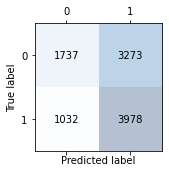

Precision: 0.627
Recall: 0.347
F1: 0.447


In [46]:
#LR
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


scorer = make_scorer(precision_score, pos_label=0)

pipe_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

## PCA_ Decision Tree

0.8934826918610066
{'decisiontreeclassifier__max_depth': 15}
[[4291  719]
 [ 453 4557]]


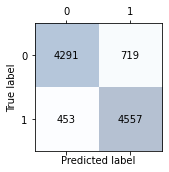

Precision: 0.905
Recall: 0.856
F1: 0.880


In [47]:
#Decision Tree
pipe_tree = make_pipeline(StandardScaler(),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

## Bagging

[[4632  378]
 [   0 5010]]


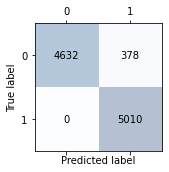

Precision: 1.000
Recall: 0.925
F1: 0.961


In [51]:
def Bagging_func(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    from sklearn.ensemble import BaggingClassifier
    from sklearn.tree import DecisionTreeClassifier

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None,
                                  random_state=1)

    bag = BaggingClassifier(base_estimator=tree,
                            n_estimators=500, 
                            max_samples=1.0, 
                            max_features=1.0, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)

    bag = bag.fit(X_train, y_train)
    y_train_pred = bag.predict(X_train)
    y_test_pred = bag.predict(X_test)

    from sklearn.metrics import confusion_matrix

    y_pred = bag.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/06_09.png', dpi=300)
    plt.show()


    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
Bagging_func()

In [57]:
Result_df=pd.DataFrame({'actual':y_test,
                    'predicted':y_pred})

In [58]:
Result_df

,actual,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
10015,0,0
10016,0,0
10017,0,1
10018,1,1


## That's all, thank you!😊